In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

#import Requests library
import requests as req
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

591

In [5]:
# Create an empty list to hold the weather data.
city_data = []


# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
   
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
   
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | magadi
Processing Record 2 of Set 1 | hare bay
Processing Record 3 of Set 1 | villarrica
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | kalmunai
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | emerald
Processing Record 13 of Set 1 | guayaramerin
Processing Record 14 of Set 1 | berlevag
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | sawtell
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | wanning
Processing Record 22 of Set 1 | wajir
Processi

Processing Record 36 of Set 4 | tankhoy
Processing Record 37 of Set 4 | terney
Processing Record 38 of Set 4 | carbonia
Processing Record 39 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 40 of Set 4 | tahta
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | katherine
Processing Record 43 of Set 4 | dehloran
Processing Record 44 of Set 4 | yulara
Processing Record 45 of Set 4 | mumford
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | barrow
Processing Record 48 of Set 4 | lesnoye
Processing Record 49 of Set 4 | college
Processing Record 50 of Set 4 | hermanus
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | predivinsk
Processing Record 4 of Set 5 | waddan
Processing Record 5 of Set 5 | opuwo
Processing Record 6 of Set 5 | souillac
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | safwah
City not found. Skipping...
Processing Reco

Processing Record 31 of Set 8 | nikolskiy
Processing Record 32 of Set 8 | manacapuru
Processing Record 33 of Set 8 | bethel
Processing Record 34 of Set 8 | george town
Processing Record 35 of Set 8 | potiskum
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | xapuri
Processing Record 38 of Set 8 | walvis bay
Processing Record 39 of Set 8 | port augusta
Processing Record 40 of Set 8 | vallenar
Processing Record 41 of Set 8 | palia kalan
Processing Record 42 of Set 8 | north bend
Processing Record 43 of Set 8 | agadir
Processing Record 44 of Set 8 | port lincoln
Processing Record 45 of Set 8 | bud
Processing Record 46 of Set 8 | seoul
Processing Record 47 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 48 of Set 8 | nizhniy kuranakh
Processing Record 49 of Set 8 | tlanchinol
Processing Record 50 of Set 8 | sobolevo
Processing Record 1 of Set 9 | aasiaat
Processing Record 2 of Set 9 | khakurinokhabl
Processing Record 3 of Set 9 | kaduna
Processing Re

Processing Record 17 of Set 12 | quelimane
Processing Record 18 of Set 12 | smithers
Processing Record 19 of Set 12 | mormugao
Processing Record 20 of Set 12 | whyalla
Processing Record 21 of Set 12 | belaya gora
Processing Record 22 of Set 12 | bafra
Processing Record 23 of Set 12 | yatou
Processing Record 24 of Set 12 | dolores
Processing Record 25 of Set 12 | oktyabrskiy
Processing Record 26 of Set 12 | qurayyat
Processing Record 27 of Set 12 | dali
Processing Record 28 of Set 12 | cerrito
Processing Record 29 of Set 12 | horsham
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | abashiri
Processing Record 32 of Set 12 | nueva loja
Processing Record 33 of Set 12 | yhu
Processing Record 34 of Set 12 | kieta
Processing Record 35 of Set 12 | kruisfontein
Processing Record 36 of Set 12 | dvinskoy
Processing Record 37 of Set 12 | safaga
Processing Record 38 of Set 12 | kobojango
City not found. Skipping...
Processing Record 39 of Set 12 | tabulbah
City not found. 

In [6]:
len(city_data)

548

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Magadi,12.9667,77.2333,75.54,86,100,7.25,IN,2021-06-06 19:25:17
1,Hare Bay,48.8499,-54.0148,51.19,59,97,14.88,CA,2021-06-06 19:25:17
2,Villarrica,-25.7500,-56.4333,67.62,92,100,6.69,PY,2021-06-06 19:25:17
3,Busselton,-33.6500,115.3333,48.09,74,0,7.99,AU,2021-06-06 19:18:03
4,Albany,42.6001,-73.9662,92.44,41,57,1.01,US,2021-06-06 19:21:09
5,Kalmunai,7.4167,81.8167,82.15,74,100,3.49,LK,2021-06-06 19:24:07
6,Port Alfred,-33.5906,26.8910,65.43,37,0,8.88,ZA,2021-06-06 19:18:04
7,Jamestown,42.0970,-79.2353,85.32,50,1,9.22,US,2021-06-06 19:22:34
8,Ushuaia,-54.8000,-68.3000,38.86,81,75,0.00,AR,2021-06-06 19:20:28
9,Nikolskoye,59.7035,30.7861,67.89,71,55,5.17,RU,2021-06-06 19:20:53


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Magadi,IN,2021-06-06 19:25:17,12.9667,77.2333,75.54,86,100,7.25
1,Hare Bay,CA,2021-06-06 19:25:17,48.8499,-54.0148,51.19,59,97,14.88
2,Villarrica,PY,2021-06-06 19:25:17,-25.7500,-56.4333,67.62,92,100,6.69
3,Busselton,AU,2021-06-06 19:18:03,-33.6500,115.3333,48.09,74,0,7.99
4,Albany,US,2021-06-06 19:21:09,42.6001,-73.9662,92.44,41,57,1.01
5,Kalmunai,LK,2021-06-06 19:24:07,7.4167,81.8167,82.15,74,100,3.49
6,Port Alfred,ZA,2021-06-06 19:18:04,-33.5906,26.8910,65.43,37,0,8.88
7,Jamestown,US,2021-06-06 19:22:34,42.0970,-79.2353,85.32,50,1,9.22
8,Ushuaia,AR,2021-06-06 19:20:28,-54.8000,-68.3000,38.86,81,75,0.00
9,Nikolskoye,RU,2021-06-06 19:20:53,59.7035,30.7861,67.89,71,55,5.17


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

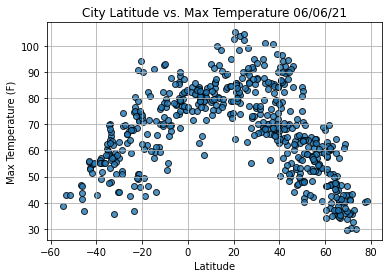

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

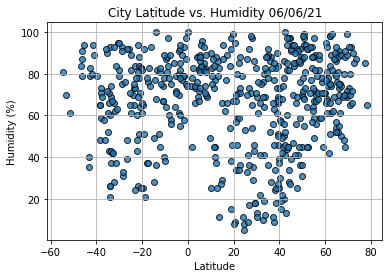

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

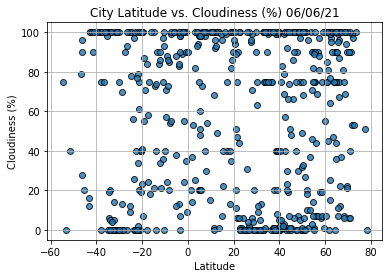

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

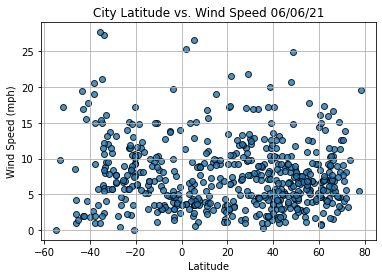

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()